<a href="https://colab.research.google.com/github/Sheulynath/Assignment/blob/X-Ray-image-or-not/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Xray_Classifier/train'  # Path to the dataset
test_dir = '/content/drive/MyDrive/Xray_Classifier/test'    # Path to the dataset

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/xray')))
print(len(os.listdir('/content/drive/MyDrive/Xray_Classifier/test/non_xray')))

620
620
500
500


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 992 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 1s 0us/step


In [7]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [8]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
31/31 [==============================] - 324s 10s/step - loss: 2.2386 - accuracy: 0.5534 - val_loss: 1.1402 - val_accuracy: 0.5061
Epoch 2/3
31/31 [==============================] - 317s 10s/step - loss: 0.4413 - accuracy: 0.8075 - val_loss: 0.5065 - val_accuracy: 0.7611
Epoch 3/3
31/31 [==============================] - 331s 11s/step - loss: 0.3337 - accuracy: 0.8901 - val_loss: 0.5192 - val_accuracy: 0.7490


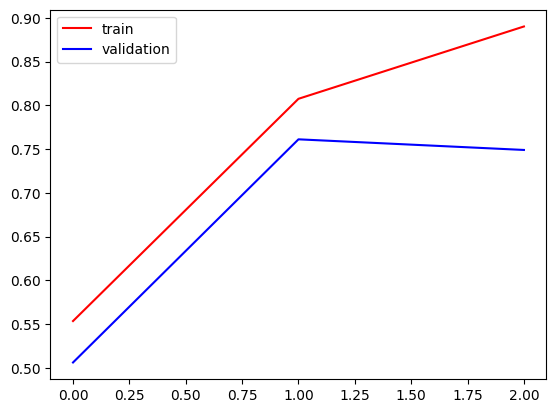

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

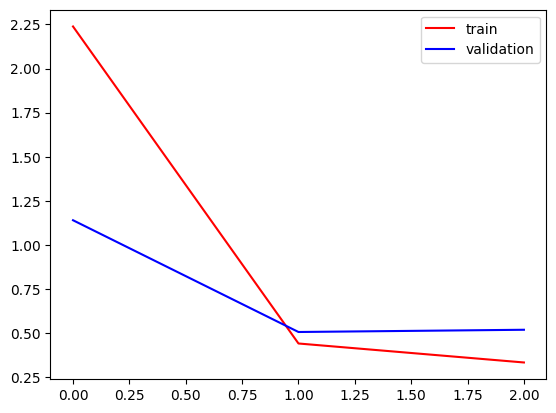

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 999 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = resnet_model.predict(test_data)
print(predictions)

32/32 [==============================] - 253s 8s/step
[[6.98239565e-01]
 [6.96197972e-02]
 [6.81496143e-01]
 [3.69453996e-01]
 [7.86938548e-01]
 [8.07920277e-01]
 [7.43506730e-01]
 [1.97870821e-01]
 [6.24945089e-02]
 [7.24913776e-01]
 [7.05782592e-01]
 [4.65148211e-01]
 [7.52936482e-01]
 [9.67470288e-01]
 [5.12892939e-02]
 [2.41393194e-01]
 [2.20931977e-01]
 [2.68057793e-01]
 [7.47197032e-01]
 [3.76884520e-01]
 [7.66645819e-02]
 [3.87728699e-02]
 [7.33885109e-01]
 [3.25745553e-01]
 [3.58135253e-02]
 [7.07170844e-01]
 [9.50209975e-01]
 [7.99966514e-01]
 [4.88668770e-01]
 [3.50060873e-02]
 [2.93778139e-04]
 [4.43259142e-02]
 [8.67311597e-01]
 [7.05782592e-01]
 [7.59002149e-01]
 [7.63544261e-01]
 [7.29158878e-01]
 [3.24346237e-02]
 [2.67504871e-01]
 [1.36730764e-02]
 [7.17750251e-01]
 [7.36448288e-01]
 [7.58124173e-01]
 [1.59137212e-02]
 [5.11973321e-01]
 [8.11306760e-02]
 [4.70384136e-02]
 [5.53244688e-02]
 [2.26513464e-02]
 [7.01152861e-01]
 [2.41107866e-02]
 [9.11995590e-01]
 [3.802902

In [14]:
len(predictions)

999

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[285 215]
 [294 205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.57      0.53       500
           1       0.49      0.41      0.45       499

    accuracy                           0.49       999
   macro avg       0.49      0.49      0.49       999
weighted avg       0.49      0.49      0.49       999



In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 992 images belonging to 2 classes.
Found 247 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
31/31 [==============================] - 226s 7s/step - loss: 0.8657 - accuracy: 0.9496 - val_loss: 4.3301 - val_accuracy: 0.5101
Epoch 2/10
31/31 [==============================] - 238s 8s/step - loss: 0.3799 - accuracy: 0.9839 - val_loss: 17.5996 - val_accuracy: 0.5020
Epoch 3/10
31/31 [==============================] - 237s 8s/step - loss: 0.3500 - accuracy: 0.9909 - val_loss: 0.8644 - val_accuracy: 0.9150
Epoch 4/10
31/31 [==============================] - 233s 7s/step - loss: 0.2053 - accuracy: 0.9899 - val_loss: 5.0691 - val_accuracy: 0.4899
Epoch 5/10
31/31 [==============================] - 244s 8s/step - loss: 0.0891 - accuracy: 0.9970 - val_loss: 2.7885 - val_accuracy: 0.5182
Epoch 6/10
31/31 [==============================] - 239s 8s/step - loss: 0.0652 - accuracy: 0.9970 - val_loss: 1.4482 - val_accuracy: 0.9555
Epoch 7/10
31/31 [==============================] - 242s 8s/step - loss: 0.0696 - accuracy: 0.9950 - val_loss: 28.0673 - val_accuracy: 0.4858
Epoch 8/10


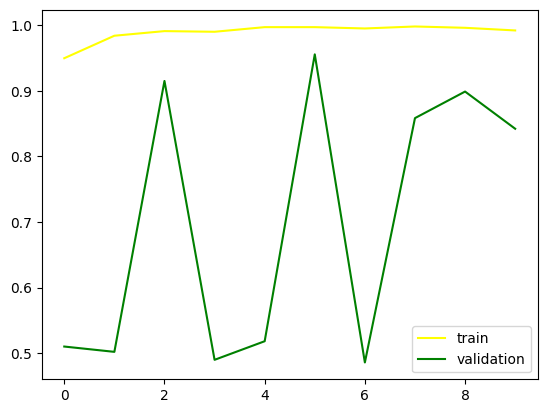

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='yellow',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

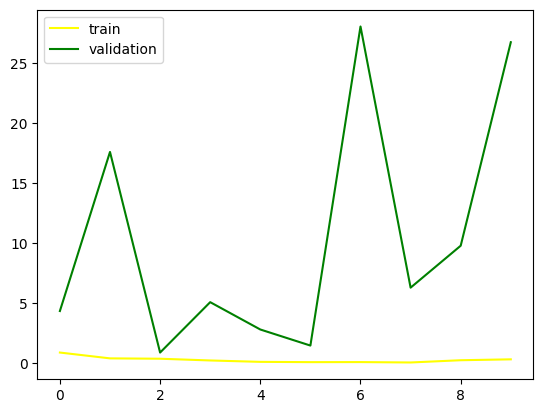

In [11]:
plt.plot(history.history['loss'],color='yellow',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 999 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

32/32 [==============================] - 120s 4s/step
[[1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [8.2186652e-10]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000

In [14]:
len(predictions)

999

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[221 279]
 [210 289]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       500
           1       0.51      0.58      0.54       499

    accuracy                           0.51       999
   macro avg       0.51      0.51      0.51       999
weighted avg       0.51      0.51      0.51       999

